BAI TAP 1

d:\Anaconda\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
C:\Users\Quang Vinh\AppData\Local\Temp\ipykernel_5788\360535432.py:16: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  restored_image = inpaint.inpaint_biharmonic(defect_image,mask,multichannel=True)


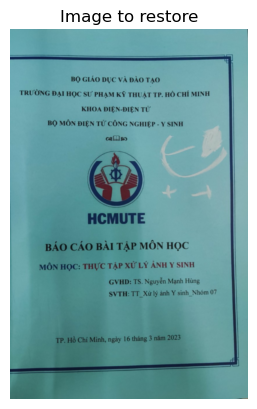

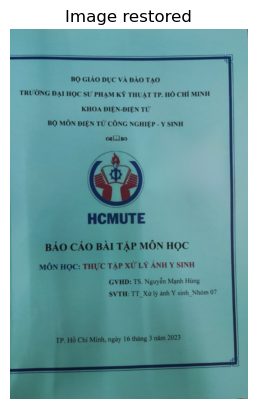

In [36]:
from skimage import color, measure, restoration, segmentation
from skimage.restoration import inpaint
import matplotlib.pyplot as plt
from skimage import filters
import numpy as np 
def get_mask(image):
 ''' Tạo ra mặt nạ mask bao gồm nhiều điểm ảnh bị hỏng bằng 
phương pháp thủ công '''
 mask = np.zeros(image.shape[:-1])
 mask[350:600, 470:752] = 1
 mask[330:600, 650:752] = 1
 return mask
def_image= plt.imread('biasach.jpg')
defect_image = filters.gaussian(def_image,cval=100)
mask = get_mask(defect_image)
restored_image = inpaint.inpaint_biharmonic(defect_image,mask,multichannel=True)
def show_image(image, title='Image', cmap_type='gray'): 
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')  
    plt.show()
show_image(defect_image, 'Image to restore')
show_image(restored_image, 'Image restored')





BAI TAP 2

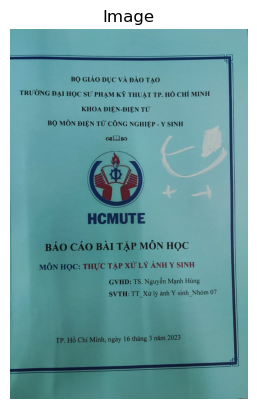

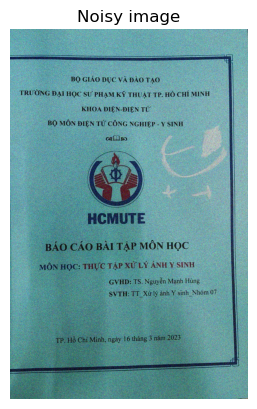

In [18]:
# Khai báo thư viện và hàm cần thiết
from skimage.util import random_noise
image= plt.imread('biasach.jpg')
# Thêm nhiễu vào ảnh gốc
noisy_image = random_noise(image)
# Hiển thị ảnh gốc và ảnh bị nhiễu
show_image(image)
show_image(noisy_image, 'Noisy image')

BAI TAP 3

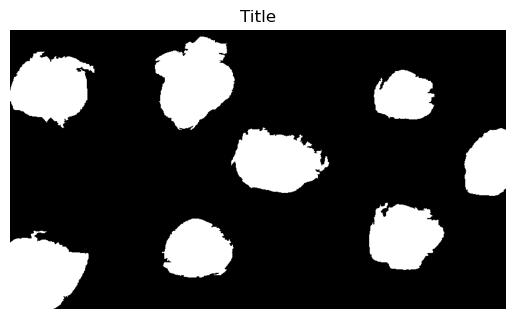

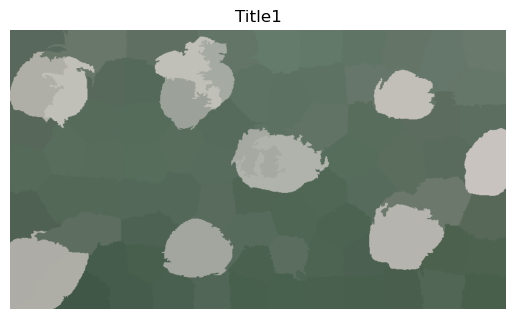

(803, 2)
(727, 2)
(487, 2)
(799, 2)
(287, 2)
(641, 2)
(567, 2)
(429, 2)


In [54]:
import cv2
cap = cv2.VideoCapture('chamtron.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 60)
ret, frame = cap.read()
if ret:
    cv2.imwrite('random_frame.jpg', frame)
cap.release()

from skimage.segmentation import slic
img = plt.imread('random_frame.jpg')
segments = segmentation.slic(img)
segmented_image = color.label2rgb(segments, img, kind='avg')
img_gray = color.rgb2gray(segmented_image)
thresh = 0.601 
thresholded_image = img_gray > thresh

show_image(thresholded_image,'Title')
show_image(segmented_image,'Title1')
contours = measure.find_contours(thresholded_image, 0.8)

for contour in contours:
    print(contour.shape)
